In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
device = torch.device('mps')

In [3]:
train = pd.read_csv(r"input/train.csv",dtype=np.float32)
target_numpy = train.label.values
feature_numpy = train.loc[:, train.columns != 'label'].values/255

In [4]:
features_train, features_test, targets_train, targets_test = (
    train_test_split(feature_numpy,target_numpy,test_size = 0.2,random_state = 42)) 

In [5]:
featureTrain = torch.from_numpy(features_train)
targetTrain = torch.from_numpy(targets_train).type(torch.LongTensor)

In [6]:
featureTest = torch.from_numpy(features_test)
targetTest = torch.from_numpy(targets_test).type(torch.LongTensor)

In [7]:
batch_size = 1000
n_iters = 10000
n_epochs = int(n_iters * batch_size / len(features_train))

In [9]:
train = torch.utils.data.TensorDataset(featureTrain,targetTrain)
test = torch.utils.data.TensorDataset(featureTest,targetTest)


trainloader = torch.utils.data.DataLoader(train,batch_size=batch_size,shuffle=False)
testloader = torch.utils.data.DataLoader(test,batch_size=batch_size,shuffle=False)

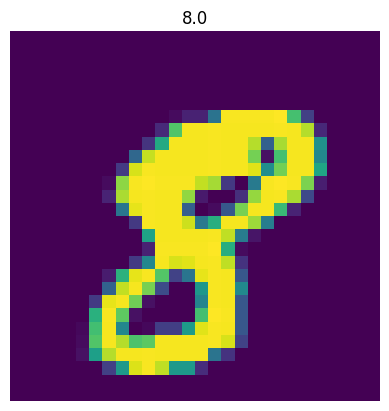

In [10]:
plt.imshow(feature_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(target_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [11]:
class Net(nn.Module):
    def __init__(self,in_dim,out_dim):
        super(Net,self).__init__()
        self.linear = nn.Linear(in_dim,out_dim)
        
    def forward(self,x):
        out = self.linear(x)
        return out
    

In [12]:
# in_dim = 28*28
# out_dim = 10
# # model2 = Net(in_dim = 28*28,out_dim = 10)
# da = torch.from_numpy(feature_numpy[10].reshape(28,28))
# model2 = nn.Linear(28*28,10,dtype=torch.uint8)
# model2(da)
# # model2(torch.from_numpy(feature_numpy[10].reshape(28,28)))

In [19]:
in_dim = 28*28
out_dim = 10
model = Net(in_dim = in_dim,out_dim = out_dim)

# model.to(device)
loss_func = nn.CrossEntropyLoss()
lr = 0.001
optimizer = torch.optim.SGD(model.parameters(),lr=lr)

In [20]:
cnt = 0
loss_list = []
iter_list = []
for epoch in range(n_epochs):
    for i,(images,labels) in enumerate(trainloader):
        train = Variable(images.view(-1,28*28))
        train.to(device)
        
        
        # print(train.shape)
        
        out = model(train)
        labels = Variable(labels)
        optimizer.zero_grad()
        loss = loss_func(out,labels)
        loss.backward()
        optimizer.step()
        cnt += 1
        
        if cnt % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in testloader: 
                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iter_list.append(cnt)
        if cnt % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(cnt, loss.data, accuracy))

Iteration: 500  Loss: 1.890451431274414  Accuracy: 65.44047546386719%
Iteration: 1000  Loss: 1.5832371711730957  Accuracy: 74.61904907226562%
Iteration: 1500  Loss: 1.37285315990448  Accuracy: 78.04762268066406%
Iteration: 2000  Loss: 1.2441550493240356  Accuracy: 79.77381134033203%
Iteration: 2500  Loss: 1.122249960899353  Accuracy: 80.92857360839844%
Iteration: 3000  Loss: 1.0375937223434448  Accuracy: 81.94047546386719%
Iteration: 3500  Loss: 0.9384924173355103  Accuracy: 82.42857360839844%
Iteration: 4000  Loss: 0.8854278326034546  Accuracy: 82.92857360839844%
Iteration: 4500  Loss: 0.8737263083457947  Accuracy: 83.48809814453125%
Iteration: 5000  Loss: 0.8052535653114319  Accuracy: 83.83333587646484%
Iteration: 5500  Loss: 0.7697465419769287  Accuracy: 84.26190185546875%
Iteration: 6000  Loss: 0.7509965300559998  Accuracy: 84.52381134033203%
Iteration: 6500  Loss: 0.7051258683204651  Accuracy: 84.78571319580078%
Iteration: 7000  Loss: 0.7116933465003967  Accuracy: 84.9642868041992

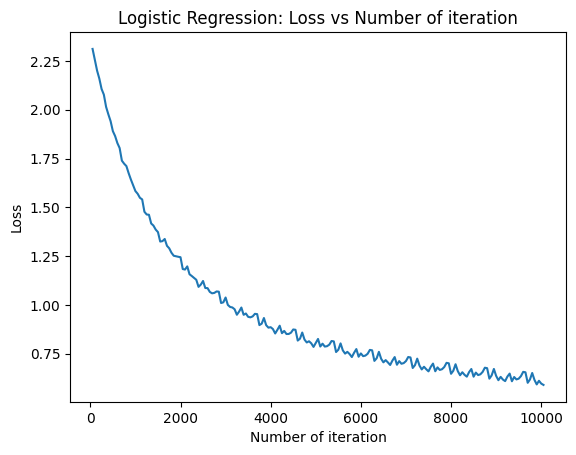

In [21]:
plt.plot(iter_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()
